# My 2021 Streaming Habits at Different Points of the Day

By: Zoe Dooley

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
#get first streaming file
streaming_hist1 = pd.read_json('MyData/StreamingHistory0.json')
streaming_hist1.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-24 01:31,Miley Cyrus,Adore You,279109
1,2021-01-24 01:35,Carrie Underwood,Blown Away,240133
2,2021-01-24 01:39,Bastille,Pompeii,214147
3,2021-01-24 01:42,RaeLynn,Say (feat. Dan + Shay),178120
4,2021-01-24 01:45,Old Dominion,Snapback,206506


In [3]:
#get second streaming file
streaming_hist2 = pd.read_json('MyData/StreamingHistory1.json')
streaming_hist2.head()

,endTime,artistName,trackName,msPlayed
0,2021-08-17 19:18,Zac Brown Band,Highway 20 Ride,169090
1,2021-08-18 03:31,Maddie & Tae,One Heart To Another,2858
2,2021-08-18 03:31,Taylor Swift,All Too Well,1130
3,2021-08-18 03:31,James Arthur,Train Wreck,1215
4,2021-08-18 03:37,Zac Efron,Gotta Go My Own Way,2431


In [13]:
#append dataframes together
streaming_hist = streaming_hist1.append(streaming_hist2, ignore_index=True)
#create column with just month and year
streaming_hist['mm_yyyy'] = pd.to_datetime(streaming_hist['endTime']).dt.strftime('%m-%Y')
#remove January 2022
streaming_hist = streaming_hist[streaming_hist['mm_yyyy'] != '01-2022']
#create column with just time
streaming_hist["time"] = pd.to_datetime(streaming_hist['endTime']).dt.strftime('%H:%M')
#create column with minutes played
streaming_hist['mPlayed'] = streaming_hist["msPlayed"]/1000/60
streaming_hist.head()

,endTime,artistName,trackName,msPlayed,mm_yyyy,time,mPlayed
0,2021-01-24 01:31,Miley Cyrus,Adore You,279109,01-2021,01:31,4.651817
1,2021-01-24 01:35,Carrie Underwood,Blown Away,240133,01-2021,01:35,4.002217
2,2021-01-24 01:39,Bastille,Pompeii,214147,01-2021,01:39,3.569117
3,2021-01-24 01:42,RaeLynn,Say (feat. Dan + Shay),178120,01-2021,01:42,2.968667
4,2021-01-24 01:45,Old Dominion,Snapback,206506,01-2021,01:45,3.441767


In [14]:
#splice streams into morning, afternoon, and night time
streaming_hist["tod"] = "na"
for row in range(len(streaming_hist)):
    if streaming_hist.time[row] < '05:00':
        streaming_hist.tod[row] = "Night"
    elif streaming_hist.time[row] > '17:00':
        streaming_hist.tod[row] = "Night"
    elif ('12:00' > streaming_hist.time[row] > '05:00'):
        streaming_hist.tod[row] = "Morning"
    else:
        streaming_hist.tod[row] = "Afternoon"
streaming_hist.tod.value_counts()

<ipython-input-14-b1cd81ddfaab>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b1cd81ddfaab>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b1cd81ddfaab>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-b1cd81ddfaab>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Night        11930
Morning       2970
Afternoon     1925
Name: tod, dtype: int64

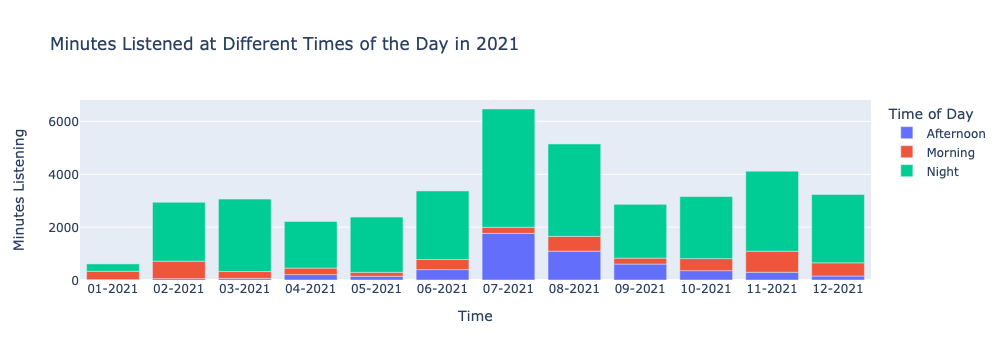

In [15]:
import plotly.express as px
streaming_hist = streaming_hist.groupby(['mm_yyyy','tod']).sum().reset_index(level=[0,1])
fig = px.bar(streaming_hist, x='mm_yyyy', y='mPlayed', color='tod', 
             title='Minutes Listened at Different Times of the Day in 2021', 
             labels={'mm_yyyy':'Time', 'mPlayed':'Minutes Listening', 'tod':'Time of Day'})
fig.show()

In [17]:
m = smf.ols("mPlayed ~ tod", data=streaming_hist).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mPlayed   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.43e-09
Time:                        15:31:02   Log-Likelihood:                -283.48
No. Observations:                  36   AIC:                             573.0
Df Residuals:                      33   BIC:                             577.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        425.9991    191.841      2.221      0.033      35.695     816.303
tod[T.Morning]   -27.2563    271.304     -0.100      0.921    -579.229     524.716
tod[T.Night]    2045.1308    271.304      7.538      0.000    1493.158    2597.104
==============================================================================
Omnibus:                       10.957   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               30.513
Skew:                           0.081   Prob(JB):                     2.37e-07
Kurtosis:                       7.507   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To determine if time of day is an influential factor that plays into the amount of minutes I listen to music on Spotify, I ran a least squares model. The R squared value for this model is 0.699, meaning that our model explains 69.9% of the change in minutes listenined. The reference category for this model is the time of day being the afternoon. This time of day has an average of 426 minutes. The time of day being morning decreases the minutes listened by around 27 minutes on average, while the time of day being night time increases the minutes listened by around 2045 minutes on average. Clearly, I tend to listen to music during the night time far more than I do at other times of the day. This means my peak listening hours are typically from 5pm-5am.